In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
path = '/content/gdrive/MyDrive/Rice_Image_Dataset'

import tensorflow as tf
import tensorflow.keras.layers as tfl

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,validation_split=0.2)

train_ds = train_datagen.flow_from_dirNectory(
        path,
        subset='training',
        target_size=(256 , 256),
        batch_size=32)

val_ds = train_datagen.flow_from_directory(
        path,
        subset='validation',
        target_size=(256 , 256),
        batch_size=32 )

Found 30405 images belonging to 6 classes.
Found 7599 images belonging to 6 classes.


In [ ]:
def convolutional_model(input_shape):
    input_img = tf.keras.Input(shape=input_shape)
    X = tfl.Conv2D(8, kernel_size=(4,4), strides=(1,1), padding='SAME')(input_img)
    X = tfl.ReLU()(X)
    X = tfl.MaxPool2D(pool_size=(8,8), strides=(8,8), padding='SAME')(X)
    X = tfl.Conv2D(16, kernel_size=(2,2), strides=(1,1), padding='SAME')(X)
    X = tfl.ReLU()(X)
    X = tfl.MaxPool2D(pool_size=(4,4), strides=(4,4), padding='SAME')(X)
    X = tfl.Flatten()(X)
    outputs = tfl.Dense(units=6, activation="softmax")(X)

    model = tf.keras.Model(inputs=input_img, outputs=outputs)
    return model

In [ ]:
conv_model = convolutional_model((256, 256, 3))
conv_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
conv_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 8)       392       
                                                                 
 re_lu (ReLU)                (None, 256, 256, 8)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 16)        528       
                                                                 
 re_lu_1 (ReLU)              (None, 32, 32, 16)        0         
                                                             

In [ ]:
history = conv_model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
951/951 [==============================] - 645s 679ms/step - loss: 0.1530 - accuracy: 0.9457 - val_loss: 0.1600 - val_accuracy: 0.9445
Epoch 2/10
951/951 [==============================] - 143s 150ms/step - loss: 0.1290 - accuracy: 0.9552 - val_loss: 0.1527 - val_accuracy: 0.9472
Epoch 3/10
951/951 [==============================] - 151s 159ms/step - loss: 0.1118 - accuracy: 0.9604 - val_loss: 0.0889 - val_accuracy: 0.9699
Epoch 4/10
951/951 [==============================] - 155s 163ms/step - loss: 0.1032 - accuracy: 0.9640 - val_loss: 0.0948 - val_accuracy: 0.9701
Epoch 5/10
951/951 [==============================] - 155s 163ms/step - loss: 0.0901 - accuracy: 0.9678 - val_loss: 0.0751 - val_accuracy: 0.9770
Epoch 6/10
951/951 [==============================] - 159s 168ms/step - loss: 0.0761 - accuracy: 0.9749 - val_loss: 0.0857 - val_accuracy: 0.9717
Epoch 7/10
951/951 [==============================] - 158s 166ms/step - loss: 0.0646 - accuracy: 0.9779 - val_loss: 0.0577 -

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


[Text(0, 0.5, 'Loss'), Text(0.5, 0, 'Epoch')]

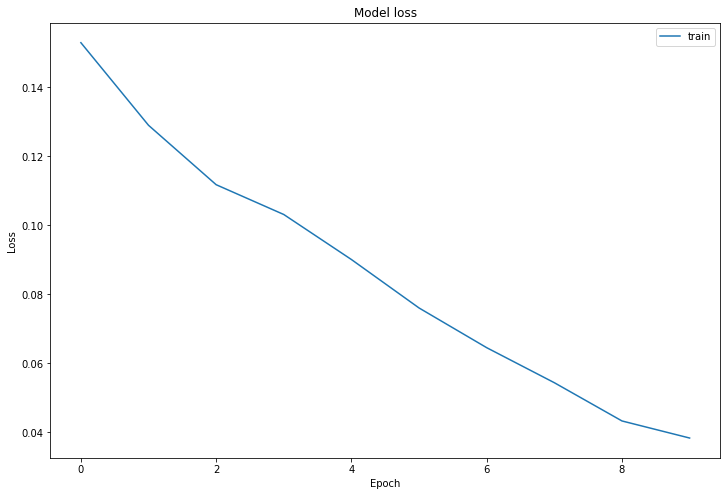

In [ ]:
df_loss_acc = pd.DataFrame(history.history)
df_loss= df_loss_acc[['loss']]
df_loss.rename(columns={'loss':'train'},inplace=True)
df_loss.plot(title='Model loss',figsize=(12,8)).set(xlabel='Epoch',ylabel='Loss')

In [ ]:
conv_model.save("model1_rice1_10epoch.h5")

Jasmine


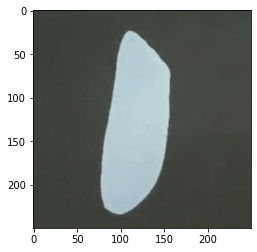

In [ ]:
from traitlets.traitlets import ClassTypes
import numpy as np
import matplotlib.pyplot as plt
import cv2
from keras.preprocessing import image
from tensorflow import keras
results={
   0:'Arborio',
   1:'Basmati',
   2:'Ipsala',
   3:'Jasmine',
   4:'Karacadag',
   5:'None'
}

# define a video capture object
vid = cv2.VideoCapture('/content/gdrive/MyDrive/videocat4.mp4')
conv_model = keras.models.load_model('/content/model1_rice1_10epoch.h5')
mean = np.array([123.68, 116.779, 103.939][::1], dtype="float32")
path = '/content/drive/MyDrive/happy2382.jpg'
def prepare(img_path):
    img = image.load_img(img_path, target_size=(256,256))
    x = image.img_to_array(img)
    x = x/255
    return np.expand_dims(x, axis=0)

result = conv_model.predict([prepare(path)])
d=image.load_img(path)
plt.imshow(d)
x=np.argmax(result,axis=1)
print(results[int(x)])

MessageError: ignored